In [1]:
import pandas as pd
import os
import json
import numpy as np
from itertools import groupby
import matplotlib.pyplot as plt
from scipy import stats,signal
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
import random
import re
import csv
from IPython.display import HTML, display, Image
import tabulate
import math as m
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/home/cbclab/Dropbox/postdocUPF/jatos_experiments')
import my_functions as myf

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.linewidth'] = 1
#mpl.rcParams['xtick.major.size'] = 20
mpl.rcParams['xtick.major.width'] = 1
#mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

fday = [1,2,3,4,5,6,7,8,9,10]
fsession = [1,2]
session_labels = ['Th','Fr','Sa','Su','Mo','Tu','We','Th','Fr','Sa']

SR_color = {'mood': [0.1,0.5,1],'food': [1,0.5,0.1],'sleep': 'y', 'real_stress':[0.1,0.5,0.2]}
PV_color = {'DO':[1,0,0.4],'SO':[0.4,0,1],'NO':'k'}
PV_line = {'DO':'-','SO':'-','NO':'-'}

key_SR = ['mood','food','sleep', 'real_stress']
key_PV = ['Dsubj_optout_oo','Ssubj_optout_oo','subj_perf_no','OKubj_RT_no','DoverConf','SoverConf','risk_av']
key_name = key_SR+key_PV

pair_keys_SR = list(itertools.combinations(key_SR, 2))
key_SR = ['mood','food','sleep', 'real_stress']
key_SR2plot = [key_SR[:int(len(key_SR)/2)],key_SR[int(len(key_SR)/2):]]

# pair of PV 
pair_keys_PV = list(itertools.combinations(key_PV[:-3], 2))
pair_keys_PV2plot = [pair_keys_PV[:int(len(pair_keys_PV)/2)],pair_keys_PV[int(len(pair_keys_PV)/2):]]
key_name_PV = {'Dsubj_optout_oo':'DO','Ssubj_optout_oo':'SO','subj_perf_no':'acc NO','OKubj_RT_no':'RT NO'}
pair_key_name_PV2plot = [[[key_name_PV[k] for k in tupl] for tupl in lista] for lista in pair_keys_PV2plot]

pair_SR_PV,pair_SR_PV2plot = [],[]
for pv in key_PV:
    aux = []
    for sr in key_SR:
        pair_SR_PV.append((sr,pv))
        aux.append((sr,pv))
    pair_SR_PV2plot.append(aux)

key_diff = ['Dperf_oo', 'Sperf_oo', 'perf_no', 'Dn_trials_oo', 'Sn_trials_oo', 'NOn_trials', \
            'DRT_OKoo', 'SRT_OKoo', 'RT_no', 'RT_noNOK', 'Doptout', 'Soptout']

unique_signals_dots = [1,2,3,4]
unique_signals_gabor = [1,2,3]

main_path = '/home/cbclab/Dropbox/postdocUPF/jatos_experiments'

path_results_dots = main_path + '/dots/notebooks/results_tanda_1/'
path_results_gabor = main_path + '/gabor/notebooks/results_tanda_1/'

In [2]:
dfGabor=pd.read_csv(path_results_gabor+'BLMMgabor_singleModel.csv')

In [3]:
dfDots=pd.read_csv(path_results_dots+'BLMMdots_singleModel.csv')

In [4]:
dfGabor

,Unnamed: 0,Unnamed: 1,intercept,1|subj,slope,slope|subj,dwaic,d_loo,r2,r2_std,control_r2,control_r2_std
0,Dsubj_optout_oo,mood,26.522938,0.002964,-2.171847,-0.002585,-1.346714,-1.415893,0.769269,0.009095,0.769647,0.008162
1,NaN,real_stress,23.975586,-0.105270,2.970884,-0.036636,0.601140,0.386171,0.771576,0.009316,0.769625,0.009008
2,NaN,food,23.910653,0.032882,1.624105,0.179134,-1.536266,-1.550723,0.768714,0.008501,0.769995,0.008346
3,NaN,sleep,28.014003,-0.220314,-4.206316,-0.054546,-0.279706,-0.373649,0.744127,0.010371,0.741827,0.009214
4,OKubj_RT_no,mood,0.981010,-0.000274,0.012809,0.000123,1.055636,1.134324,0.115277,0.004841,0.101817,0.004203
5,NaN,real_stress,0.992461,-0.000042,-0.007709,0.000101,-0.890874,-0.913994,0.105531,0.004277,0.097725,0.004278
6,NaN,food,0.978893,0.000104,0.015415,-0.000314,0.200090,0.227639,0.108966,0.004793,0.099688,0.004236
7,NaN,sleep,0.982714,0.000078,0.008656,0.000040,-0.545865,-0.629454,0.078746,0.003715,0.071225,0.003171


In [5]:
dfGabor['dwaic'][:4]

0   -1.346714
1    0.601140
2   -1.536266
3   -0.279706
Name: dwaic, dtype: float64

In [6]:
SR = ['mood','stress','food','sleep']

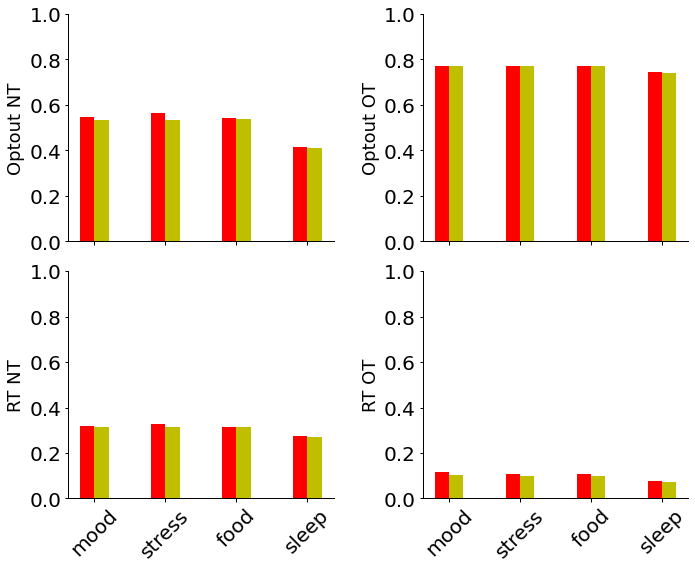

In [10]:
X = np.arange(4)
fig,ax = plt.subplots(2,2,figsize=(10,8))
plt.subplots_adjust(hspace = 0.2)  
plt.subplots_adjust(wspace = 0.6)  

ax[0,0].bar(X - 0.1,dfDots['r2'][:4], color = 'r', width = 0.2)
ax[0,0].bar(X + 0.1,dfDots['control_r2'][:4], color = 'y', width = 0.2)
ax[0,0].set_ylabel('Optout NT')
ax[0,0].set_xticks(X)
ax[0,0].set_xticklabels([])

ax[1,0].bar(X - 0.1,dfDots['r2'][4:], color = 'r', width = 0.2)
ax[1,0].bar(X + 0.1,dfDots['control_r2'][4:], color = 'y', width = 0.2)
ax[1,0].set_ylabel('RT NT')
ax[1,0].set_xticks(X)
ax[1,0].set_xticklabels(SR,rotation=45)

ax[0,1].bar(X - 0.1,dfGabor['r2'][:4], color = 'r', width = 0.2)
ax[0,1].bar(X + 0.1,dfGabor['control_r2'][:4], color = 'y', width = 0.2)
ax[0,1].set_ylabel('Optout OT')
ax[0,1].set_xticklabels([])
ax[0,1].set_xticks(X)

ax[1,1].bar(X - 0.1,dfGabor['r2'][4:], color = 'r', width = 0.2)
ax[1,1].bar(X + 0.1,dfGabor['control_r2'][4:], color = 'y', width = 0.2)
ax[1,1].set_ylabel('RT OT')
ax[1,1].set_xticks(X)
ax[1,1].set_xticklabels(SR,rotation=45)

for i in range(2):
    for j in range(2):
        ax[i,j].axhline(0,color='k',lw=1)
        ax[i,j].set_ylim(0,1)

plt.tight_layout()
plt.savefig('figS5.png')
plt.show()

In [ ]:
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax[0,0].set_xticklabels(SR)

plt.show()

In [ ]:
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


plt.show()º